# Problem

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    1. Which variables are significant in predicting the price of a car
    2. How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Business Goal 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# setting display format so that large values are shown properly
pd.set_option('display.float_format', lambda x: '%.4f' % x)

sns.set_style(style='dark')
sns.set_context("notebook")

In [2]:
car_sales = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_sales.shape

(205, 26)

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Converting `car_ID` as the index and then dropping `car_ID` column as it will not have any impact on the analysis

In [5]:
car_sales.index = car_sales['car_ID']

car_sales = car_sales.drop('car_ID',axis=1)

In [6]:
car_sales

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,...,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,...,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,...,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,...,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,...,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,...,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000


In [7]:
car_sales['companyname'] = car_sales['CarName'].str.split(' ').str[0]

In [8]:
car_sales['companyname'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
renault         2
maxda           2
toyouta         1
Nissan          1
mercury         1
vokswagen       1
porcshce        1
Name: companyname, dtype: int64

In [9]:
def map_company_name(car_name):
    if car_name == 'vw':
        return 'volkswagen'
    elif car_name == 'maxda':
        return 'mazda'
    elif car_name == 'porcshce':
        return 'porsche'
    elif car_name == 'Nissan':
        return 'nissan'
    elif car_name == 'toyouta':
        return 'toyota'
    elif car_name == 'vokswagen':
        return 'volkswagen'
    else:
        return car_name

In [10]:
car_sales['companyname'] = car_sales['companyname'].apply(map_company_name)

In [11]:
car_sales['companyname'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: companyname, dtype: int64

Removing `CarName` as we have extracted a new column from it.

In [12]:
car_sales = car_sales.drop('CarName', axis=1)

In [13]:
def get_columns_with_nan_percentage(df):
    nan_cols = [{
            "column":c,
            "percentage":round(100*(df[c].isnull().sum()/len(df[c].index)), 2)
            } for c in df.columns if round(100*(df[c].isnull().sum()/len(df[c].index)), 2)>0]
    return pd.DataFrame.from_records(nan_cols)

In [14]:
get_columns_with_nan_percentage(car_sales)

""


We can see that no column has NAN values

# Analysis of the data

Reference for the following methods: https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#89dd and the previous loan-defaulter case study.


In [15]:
default_figsize = (10, 5)

In [16]:
def categorical_summarized(dataframe,
                           x=None,
                           y=None,
                           hue=None,
                           palette='Set1',
                           verbose=True,
                           figsize=default_figsize,
                           title="",
                           xlabel=None,
                           ylabel=None,
                           rotate_labels=False):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]

    if verbose:
        print(series.describe())
        print('mode: ', series.mode())
        print('=' * 80)
        print(series.value_counts())

    sns.set(rc={'figure.figsize': figsize})
    sorted_df = dataframe.sort_values(column_interested)
    ax = sns.countplot(x=x, y=y, hue=hue, data=sorted_df)

    plt.title(title)
    if not xlabel:
        xlabel = column_interested
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    total = len(dataframe[column_interested])
    if rotate_labels:
        plt.setp(ax.get_xticklabels(),
                 rotation=30,
                 horizontalalignment='right')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    plt.show()

In [17]:
def quantitative_summarized(dataframe,
                            x=None,
                            y=None,
                            hue=None,
                            palette='Set1',
                            ax=None,
                            verbose=True,
                            swarm=False,
                            figsize=default_figsize):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    if verbose:
        print('mode: ', series.mode())
        print('=' * 80)
        print(series.value_counts())
    sns.set(rc={'figure.figsize': figsize})

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x,
                      y=y,
                      hue=hue,
                      data=dataframe,
                      palette=palette,
                      ax=ax)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    plt.show()

In [18]:
def plot_column(df,
                col,
                chart_type='Hist',
                dtype=int,
                bins=25,
                figsize=default_figsize):
    temp_df = df[col]
    sns.set(rc={'figure.figsize': figsize})
    if chart_type == 'Hist':
        ax = sns.countplot(temp_df)
    elif chart_type == 'Dens':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bins), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.style.use('fivethirtyeight')
    plt.show()

In [19]:
def univariate_analysis(col,
                        chart_type='Dens',
                        df=car_sales,
                        is_categorical=False,
                        title="",
                        xlabel=None,
                        ylabel=None,
                        rotate_labels=False,
                        bins=25):
    if is_categorical:
        categorical_summarized(df,
                               x=col,
                               title=title,
                               xlabel=xlabel,
                               ylabel=ylabel,
                               rotate_labels=rotate_labels,
                               verbose=False)
    else:
        quantitative_summarized(df, y=col, verbose=False)
        plot_column(df, col, chart_type=chart_type, bins=bins)

In [20]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

## Defining variables

### Categorical Variables

- symboling
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- fuelsystem
- companyname

### Continuous Variables

- wheelbase
- carlength
- carwidth
- carheight
- curbweight
- enginesize
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- citympg
- highwaympg

## `price` is the dependent variable, so let us start with the analysis of `price`

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


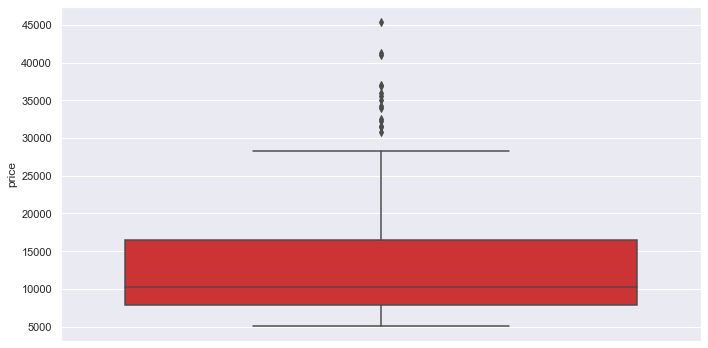

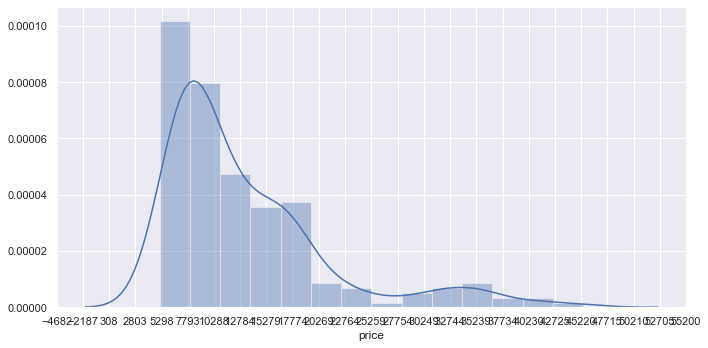

In [21]:
univariate_analysis('price')

We can see that the price is right skewed because we have some cars with price more than `$30000`. More than **`75 percent`** cars have price less than `$17000`. From the graph it is clear there are some outliers however, we can not remove these rows as they are actual data points. 

## Now, we will analyze various variables. We will analyze the variables against price too

### Analyzing categorical variables

In [22]:
def bivariate_analysis(col, df=car_sales, is_categorical=True):
    univariate_analysis(col, is_categorical=is_categorical)
    quantitative_summarized(dataframe=car_sales,
                            y='price',
                            x=col,
                            swarm=True,
                            verbose=False)

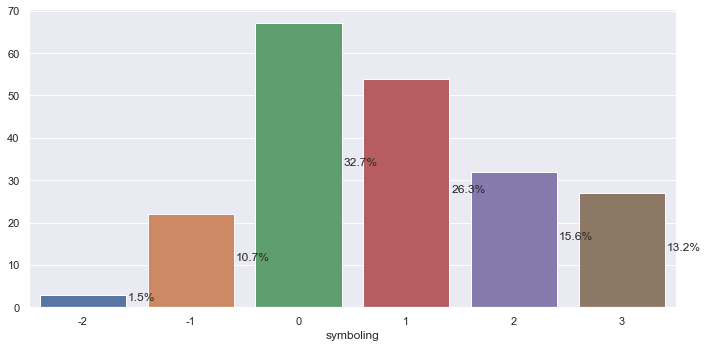

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


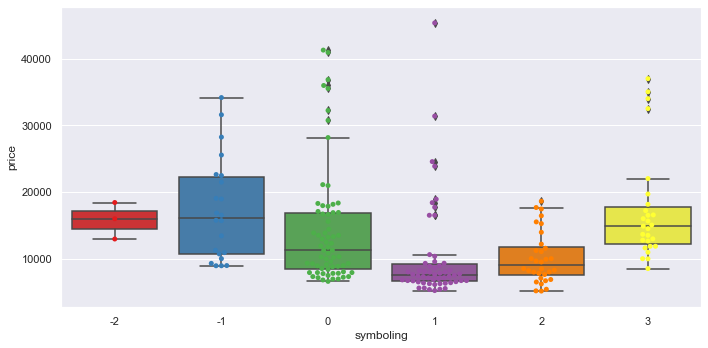

In [23]:
bivariate_analysis('symboling')

We can see that most cars are sold for `symboling` value **0** and **1**. We can also see that the prices for **1** are the lowest. The average price for the cars with `symboling` value less than 0 is high which comes from the fact they have high safety measures (insurance) thus the increased cost. However, the price for the cars with `symboling` 3 has similar prices as `symboling` -2. We can see that there is no clear pattern for the price. Thus, can be dropped.

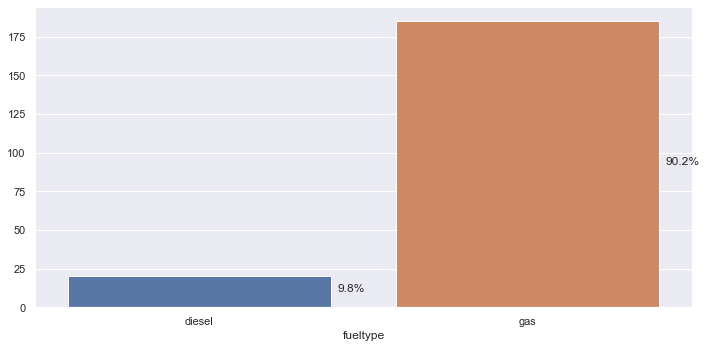

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


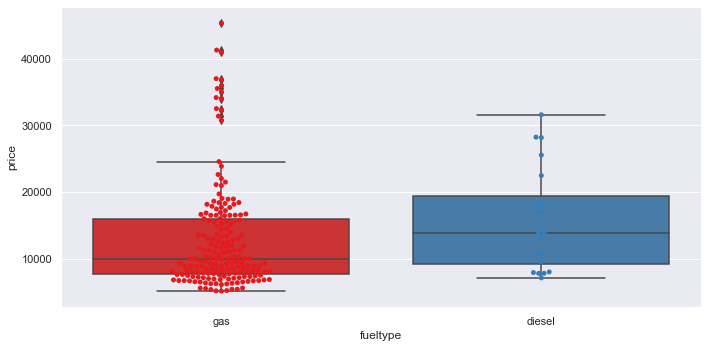

In [24]:
bivariate_analysis('fueltype')

We can see that:
1. `gas` cars the most sold ones
2. The average price of the diesel cars is higher.

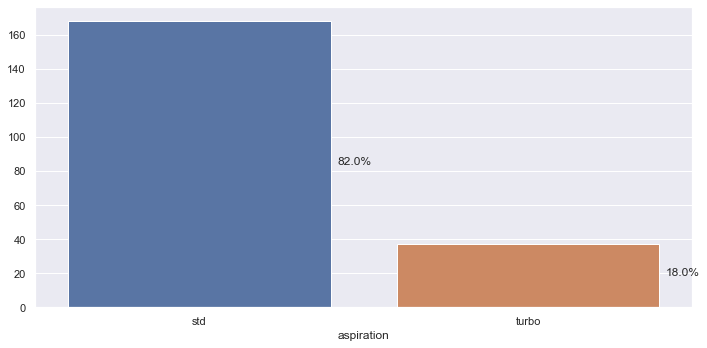

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


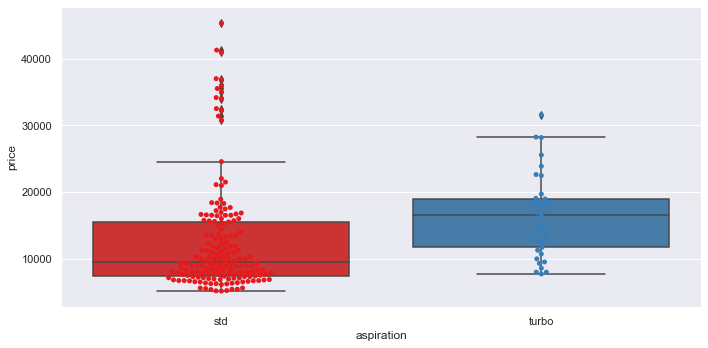

In [25]:
bivariate_analysis('aspiration')

We can see:
1. `std` cars are the most sold ones
2. However, the average price for `turbo` is higher.

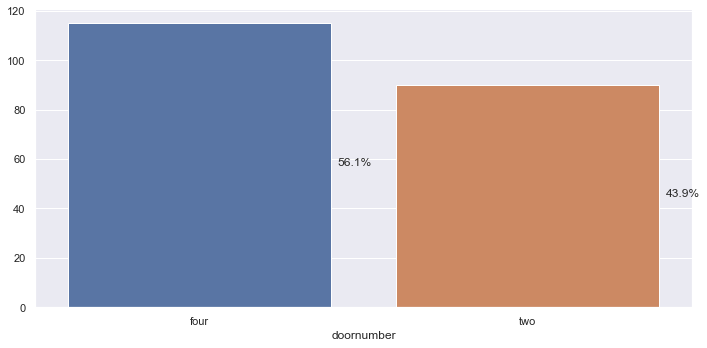

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


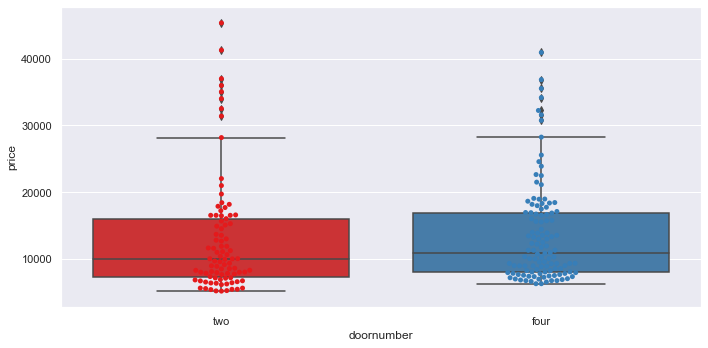

In [26]:
bivariate_analysis('doornumber')

We can that `doornumber` has no significant impact on the prices of the cars. We can drop this column for the model.

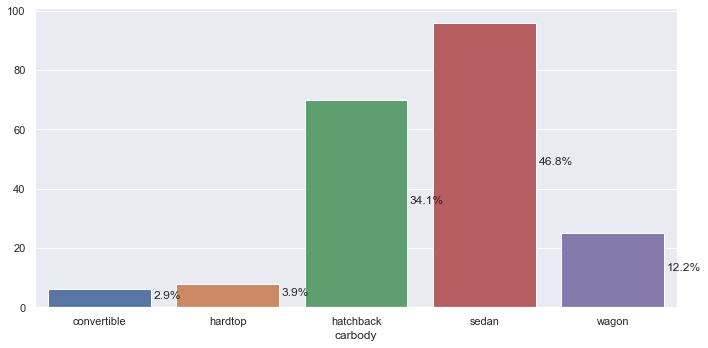

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


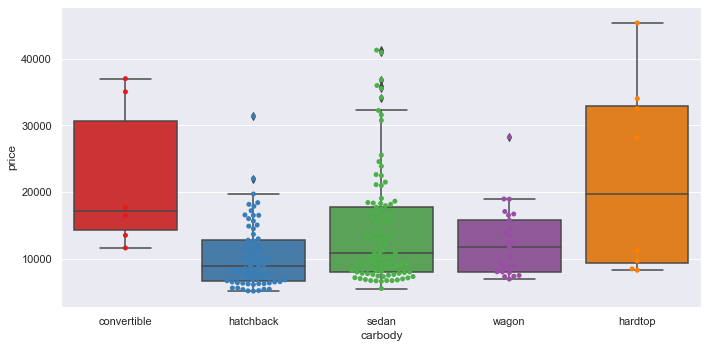

In [27]:
bivariate_analysis('carbody')

We can see:
1. 47% of the sold cars are *sedan* followed by *hatchback*
2. **convertible** are the most expensive ones followed by **hardtop**. 

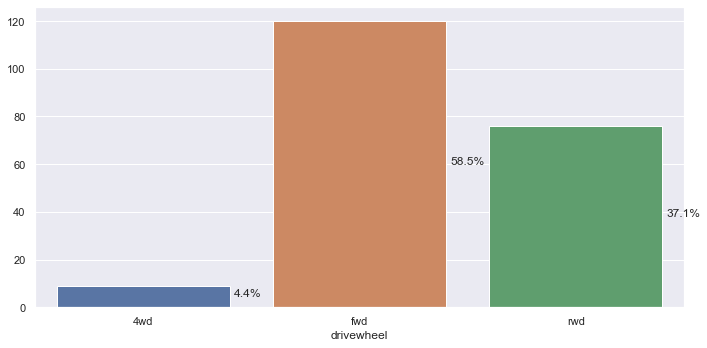

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


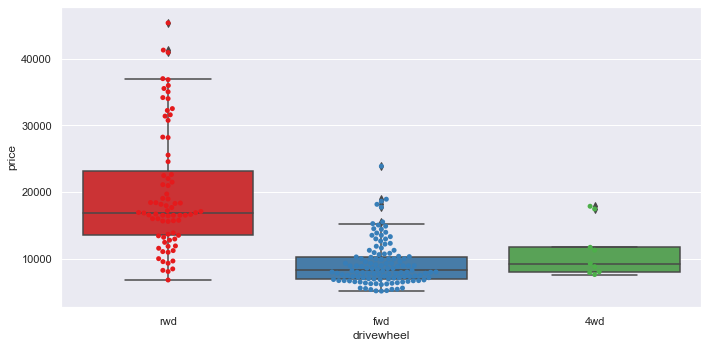

In [28]:
bivariate_analysis('drivewheel')

We can see:
1. **fwd** drive wheel cars are the most sold one followed by **rwd**.
2. **rwd** drive wheel cards are the costlier than the other types.
    

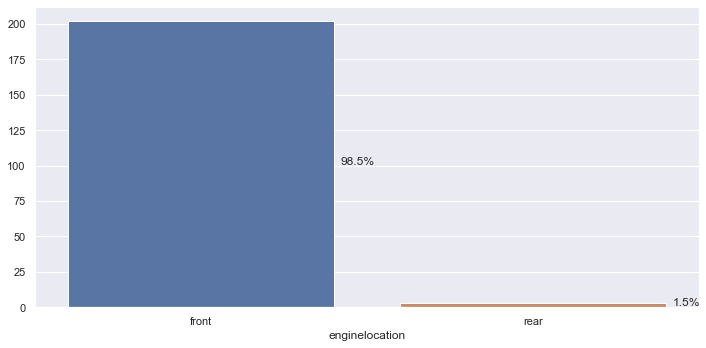

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


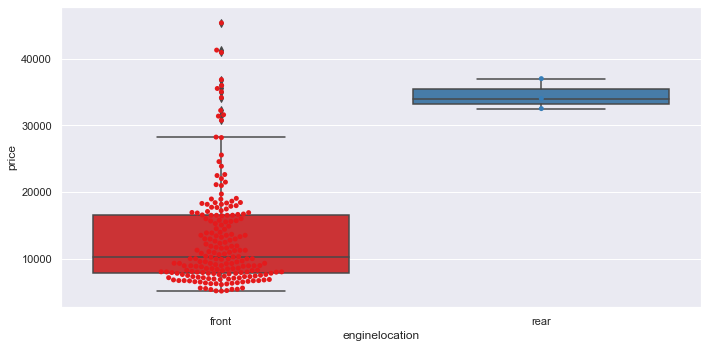

In [29]:
bivariate_analysis('enginelocation')

Almost all the cars sold have front engine. This does not provide any significant insight on the price. We can drop this column for our model.

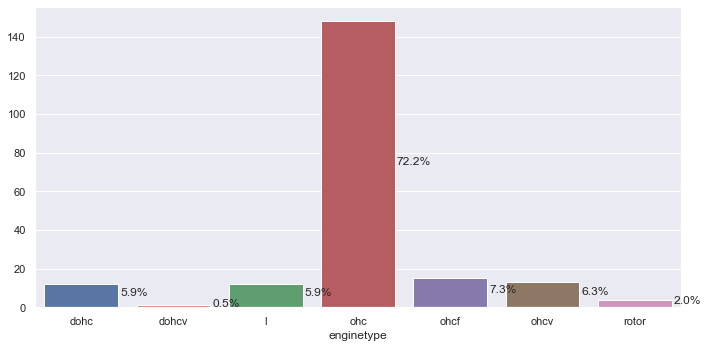

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


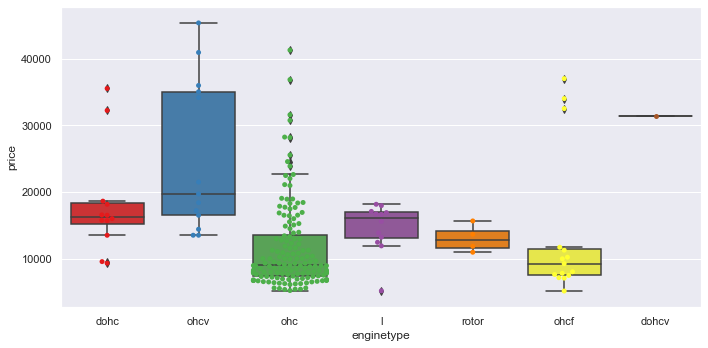

In [30]:
bivariate_analysis('enginetype')

We can see:
1. cars with `ohc` engine are the most sold
2. Also, we can see that the price is also dependent on the engine type.

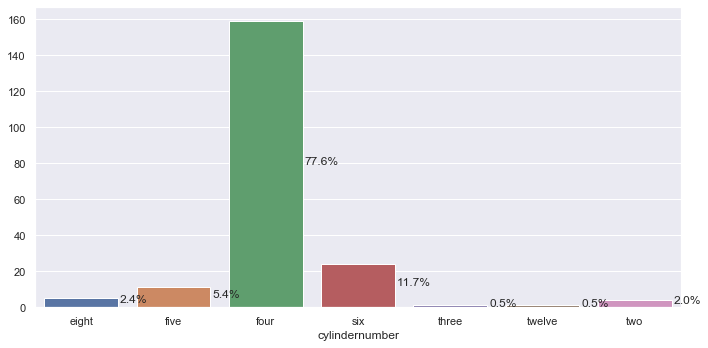

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


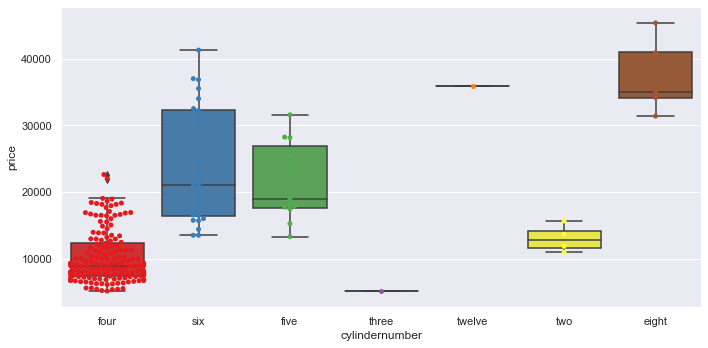

In [31]:
bivariate_analysis('cylindernumber')

We can see:
1. `four` cylinder cars are the most sold ones
2. As the number of cylinders increase, the price of the cars is also increasing.

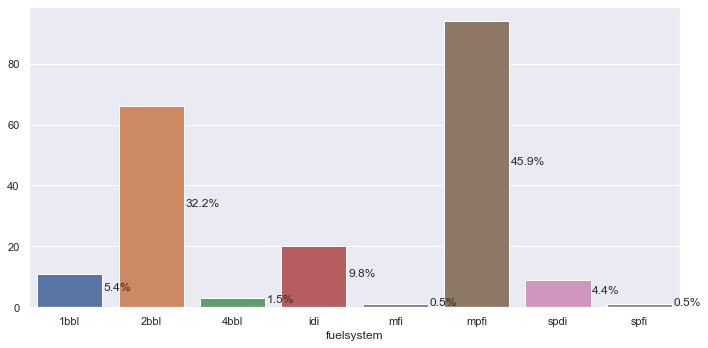

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


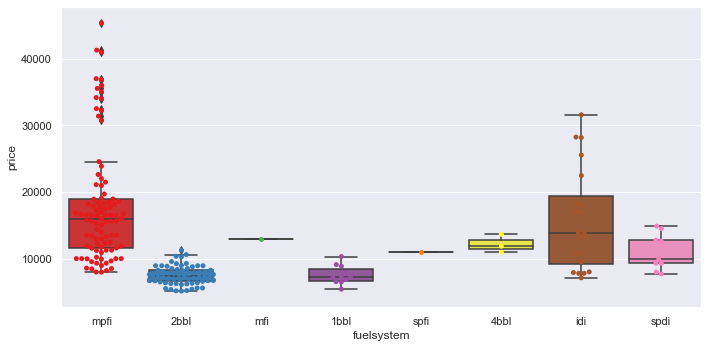

In [32]:
bivariate_analysis('fuelsystem')

We can see:
1. Cars with `mpfi` are the most sold followed by `2bbl` 
2. The price is also distributed across different fuel systems

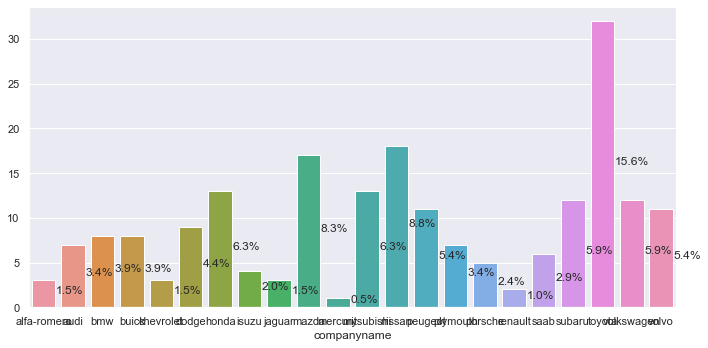

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


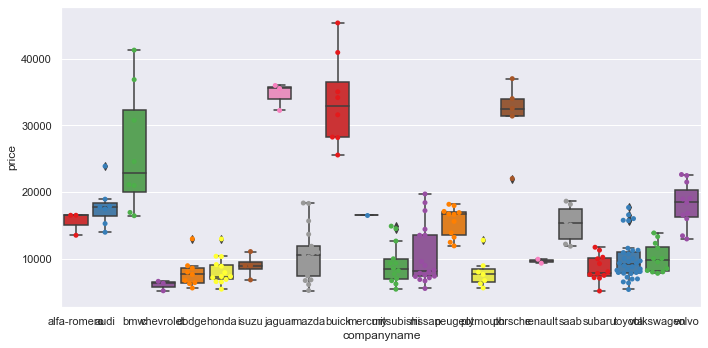

In [33]:
bivariate_analysis('companyname')

#### We can see that, the price varies based on the brand name. If we want to use this variable as the parameter in the model, it will introduce lots of dummy variables. We can use business understanding to reduce the number of dummy variables as suggested in https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/. We can divide the cars into 3 categories based on their price. 

In [34]:
def add_categorical_column(df,
                           bins,
                           column,
                           new_column,
                           interval,
                           verbose=False):
    interval.append(df[column].max() + 1)
    df[new_column] = pd.cut(df[column], interval, right=False, labels=bins)

In [35]:
add_categorical_column(car_sales, ['economy', 'middle_class', 'premium'], 'price',
                       'car_range', [0, 10000, 25000])

Binning cars based on the price into 3 categories

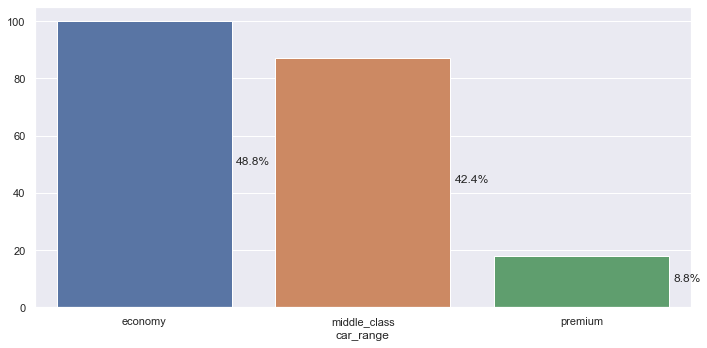

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64


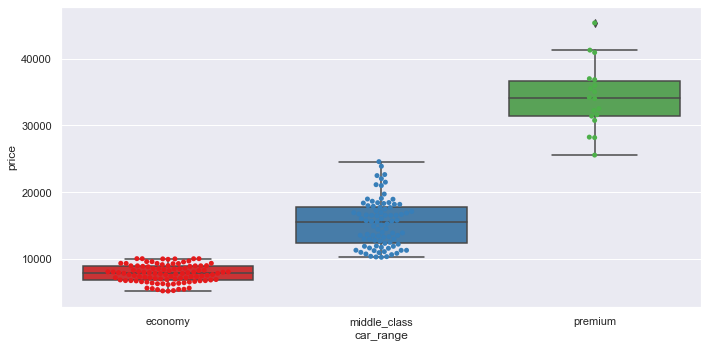

In [36]:
bivariate_analysis('car_range')

We can see:
1. Most of the cars belong to economy and middle_class
2. This variable does have an impact on the price

### Analyzing continuous variables

In [37]:
car_sales_num = car_sales[[
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
    'citympg', 'highwaympg','enginesize','price'
]]

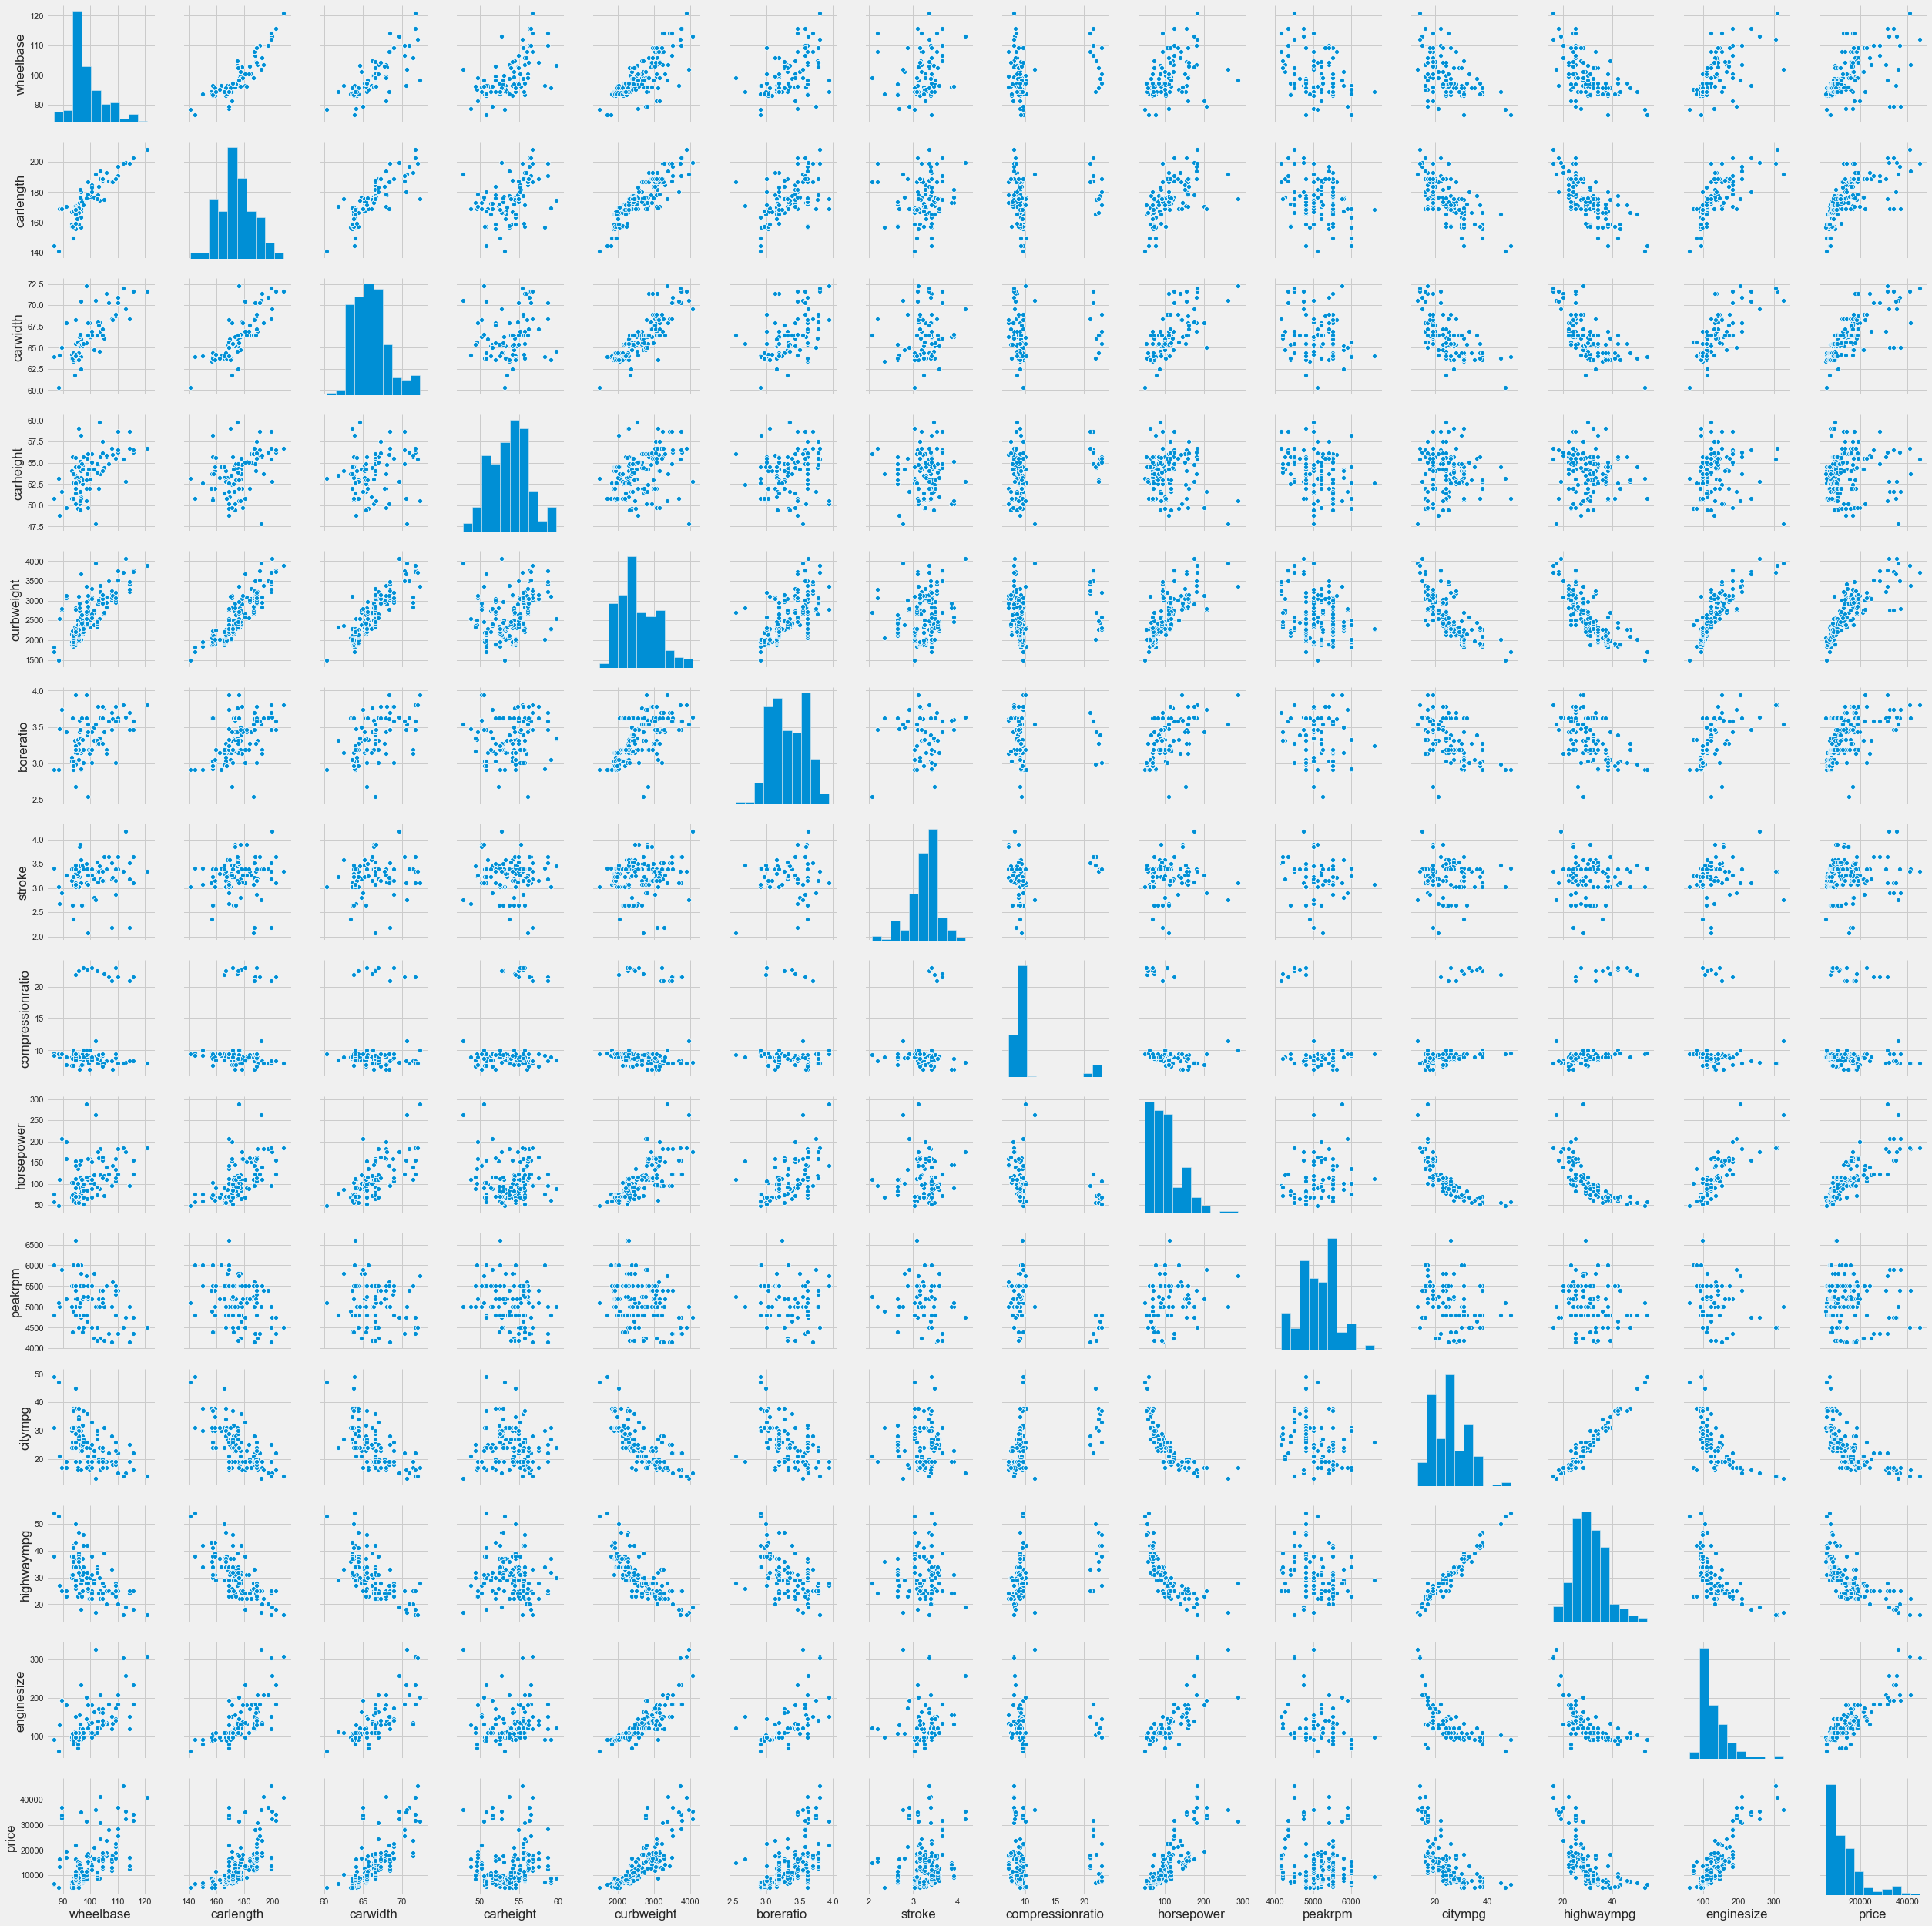

In [38]:
sns.pairplot(car_sales_num)

In [39]:
def heat_map(data):
    corr = data.corr()
    sns.set(rc={'figure.figsize': (15, 10)})
    plt.tight_layout()
    ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu',annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

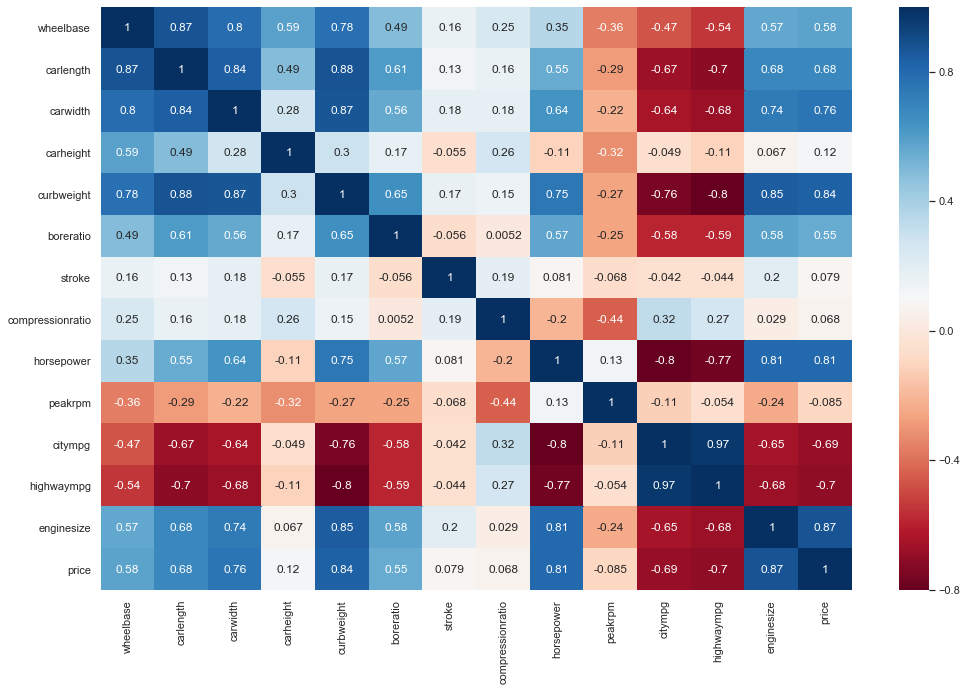

In [40]:
heat_map(car_sales_num)

We can see that, `citympg` and `highwaympg` have negative impact on the price. And these two variables are highly related to each other too. Also,`peakrpm`, `carheight`, `compressionratio`, `stroke` shows very less correlation with the price, thus can be dropped.

Also, we can create a new variable fuel_economy based on highwaympg and citympg.
```
Fuel Economy = 0.55 * City value + 0.45 * Highway Value
```

We can see that `carlength` and `carwidth` are highly correlated to `curbweight`, we can drop `carlength` and `carwidth`


In [41]:
car_sales['fuel_economy'] = 0.55*car_sales['citympg'] + 0.45*car_sales['highwaympg']

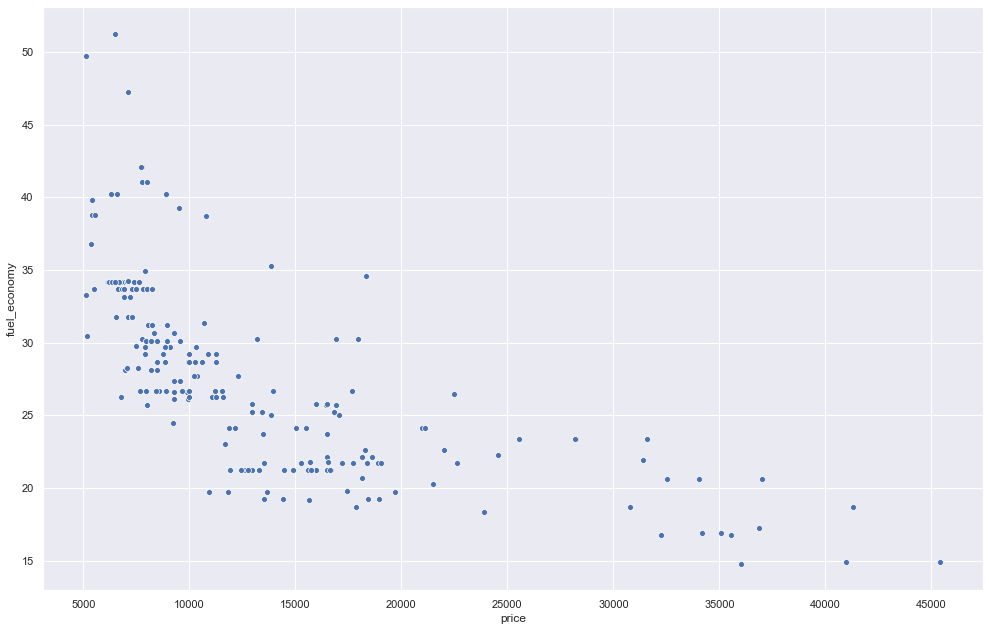

In [42]:
sns.scatterplot('price','fuel_economy',data=car_sales)

We can see that the fuel economy has an impact (negative) on the price.

In [43]:
car_sales.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'companyname', 'car_range',
       'fuel_economy'],
      dtype='object')

After the above analysis, we can select following variables for the models

- fueltype
- aspiration
- carbody
- drivewheel
- enginetype
- cylindernumber
- fuelsystem
- car_range
- wheelbase
- curbweight
- boreratio
- horsepower
- fuel_economy
- enginesize

In [44]:
car_sales_model = car_sales[[
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
    'cylindernumber', 'fuelsystem', 'car_range', 'wheelbase', 'curbweight',
    'boreratio', 'horsepower', 'fuel_economy', 'enginesize', 'price'
]]

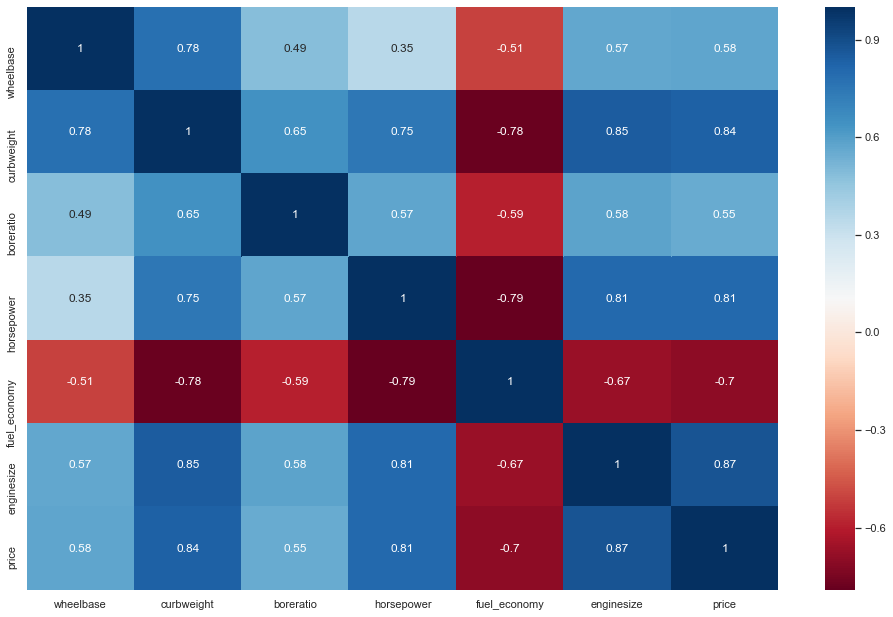

In [45]:
heat_map(car_sales_model)

### Now, as we have decided our starting variables for the model, we will transform the data for these  variables so that it can be used for the model. We will start with one hot encoding followed by MinMaxScaling.

## Dummy variables

In [46]:
columns_to_encode = [
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
    'cylindernumber', 'fuelsystem', 'car_range'
]

for c in columns_to_encode:
    car_sales_model = pd.get_dummies(car_sales_model,
                                     prefix=[c],
                                     columns=[c],
                                     drop_first=True)

In [47]:
car_sales_model.head()

,wheelbase,curbweight,boreratio,horsepower,fuel_economy,enginesize,price,fueltype_gas,aspiration_turbo,carbody_hardtop,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_range_middle_class,car_range_premium
car_ID,,,,,,,,,,,,,,,,,,,,,
1,88.6000,2548,3.4700,111,23.7000,130,13495.0000,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,88.6000,2548,3.4700,111,23.7000,130,16500.0000,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,94.5000,2823,2.6800,154,22.1500,152,16500.0000,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,99.8000,2337,3.1900,102,26.7000,109,13950.0000,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5,99.4000,2824,3.1900,115,19.8000,136,17450.0000,1,0,0,...,0,0,0,0,0,1,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
car_sales_model_train, car_sales_model_test = train_test_split(car_sales_model, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [
    'wheelbase', 'curbweight',  'boreratio',
    'horsepower', 'fuel_economy', 'enginesize', 'price'
]

car_sales_model_train[num_vars] = scaler.fit_transform(
    car_sales_model_train[num_vars])

car_sales_model_train.head()

,wheelbase,curbweight,boreratio,horsepower,fuel_economy,enginesize,price,fueltype_gas,aspiration_turbo,carbody_hardtop,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_range_middle_class,car_range_premium
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.2448,0.2727,0.2302,0.0833,0.5309,0.1396,0.0688,1,0,0,...,0,1,0,0,0,0,0,0,0,0
126,0.2724,0.5004,1.0000,0.3958,0.2140,0.3396,0.4669,1,0,0,...,0,0,0,0,0,1,0,0,1,0
167,0.2724,0.3150,0.4444,0.2667,0.3443,0.1396,0.1221,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0690,0.4112,0.6270,0.2625,0.2442,0.2604,0.3144,1,0,0,...,0,0,0,0,0,1,0,0,1,0
200,0.6103,0.6474,0.7460,0.4750,0.1221,0.2604,0.3821,1,1,0,...,0,0,0,0,0,1,0,0,1,0


### Dividing into X and Y sets for the model building

In [51]:
y_train = car_sales_model_train.pop('price')
X_train = car_sales_model_train

### Building our model

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('boreratio', False, 4),
 ('horsepower', True, 1),
 ('fuel_economy', False, 2),
 ('enginesize', True, 1),
 ('fueltype_gas', False, 24),
 ('aspiration_turbo', False, 20),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 11),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', False, 13),
 ('enginetype_ohcv', False, 17),
 ('enginetype_rotor', False, 7),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 10),
 ('cylindernumber_three', False, 8),
 ('cylindernumber_twelve', False, 18),
 ('cylindernumber_two', False, 9),
 ('fuelsystem_2bbl', False, 19),
 ('fuelsystem_4bbl', False, 16),
 ('fuelsystem_idi', False, 23),
 ('fuelsystem_mfi', False, 25),
 ('fuelsystem_mpfi', False, 22),
 ('fuelsystem_spdi

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'horsepower', 'enginesize',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'car_range_premium'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['boreratio', 'fuel_economy', 'fueltype_gas', 'aspiration_turbo',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_range_middle_class'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [59]:
def model(df):
    lm = sm.OLS(y_train, X_train_rfe).fit() 
    print(lm.summary())
    return lm

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [
        variance_inflation_factor(df.values, i)
        for i in range(df.shape[1])
    ]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

## Model 1

In [61]:
lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.05e-62
Time:                        13:46:25   Log-Likelihood:                 186.01
No. Observations:                 143   AIC:                            -350.0
Df Residuals:                     132   BIC:                            -317.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0330      0.04

,Features,VIF
0,const,47.7400
2,curbweight,13.4300
7,carbody_sedan,12.6800
6,carbody_hatchback,11.0800
4,enginesize,7.6700
8,carbody_wagon,6.2200
3,horsepower,6.0300
1,wheelbase,5.4300
10,car_range_premium,2.3400
5,carbody_hardtop,1.9300


## Model 2

We can see `enginesize` has high p-value and VIF more than 5, so we will drop this column.

In [62]:
X_train_rfe = X_train_rfe.drop(["enginesize"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.51e-63
Time:                        13:46:25   Log-Likelihood:                 185.39
No. Observations:                 143   AIC:                            -350.8
Df Residuals:                     133   BIC:                            -321.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0286      0.03

,Features,VIF
0,const,47.2300
6,carbody_sedan,12.6800
2,curbweight,11.5600
5,carbody_hatchback,11.0400
7,carbody_wagon,6.1400
1,wheelbase,5.4200
3,horsepower,5.1300
4,carbody_hardtop,1.9300
9,car_range_premium,1.8300
8,enginetype_dohcv,1.3900


# Model 3

In [63]:
# We can see `carbody_hardtop` has the highest p-value, so we will drop this column.# 
X_train_rfe = X_train_rfe.drop(["carbody_hardtop"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     157.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.74e-64
Time:                        13:46:25   Log-Likelihood:                 184.46
No. Observations:                 143   AIC:                            -350.9
Df Residuals:                     134   BIC:                            -324.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0057      0.03

,Features,VIF
0,const,26.7100
2,curbweight,10.3100
5,carbody_sedan,7.3000
4,carbody_hatchback,6.2700
1,wheelbase,4.9800
3,horsepower,4.7500
6,carbody_wagon,3.9900
8,car_range_premium,1.8100
7,enginetype_dohcv,1.3700


# Model 4

In [64]:
# We can see `carbody_sedan` has the highest p-value, so we will drop this column.# 
X_train_rfe = X_train_rfe.drop(["carbody_sedan"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.64e-65
Time:                        13:46:26   Log-Likelihood:                 182.77
No. Observations:                 143   AIC:                            -349.5
Df Residuals:                     135   BIC:                            -325.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0492      0.01

,Features,VIF
2,curbweight,9.6900
0,const,8.9300
3,horsepower,4.7100
1,wheelbase,4.0500
7,car_range_premium,1.7900
6,enginetype_dohcv,1.3700
4,carbody_hatchback,1.2800
5,carbody_wagon,1.2000


# Model 5

In [65]:
# We can see `wheelbase` has the highest p-value, so we will drop this column. 
X_train_rfe = X_train_rfe.drop(["wheelbase"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.70e-65
Time:                        13:46:26   Log-Likelihood:                 181.73
No. Observations:                 143   AIC:                            -349.5
Df Residuals:                     136   BIC:                            -328.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0413      0.01

,Features,VIF
0,const,8.0000
1,curbweight,3.5600
2,horsepower,3.4400
6,car_range_premium,1.7700
5,enginetype_dohcv,1.3400
3,carbody_hatchback,1.2600
4,carbody_wagon,1.1700


# Model 6

In [66]:
# We can see that the VIF values are less than 5, 
# however, cars with `dohcv` are very less in number, should not be considered.
X_train_rfe = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     238.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.25e-66
Time:                        13:46:26   Log-Likelihood:                 179.43
No. Observations:                 143   AIC:                            -346.9
Df Residuals:                     137   BIC:                            -329.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0412      0.01

,Features,VIF
0,const,8.0000
1,curbweight,3.2300
2,horsepower,2.8600
5,car_range_premium,1.7200
3,carbody_hatchback,1.2600
4,carbody_wagon,1.1600


# Model 7

In [67]:
# We can see there are two variables based on carbody, we can try to drop one and see its impact on the model
X_train_rfe = X_train_rfe.drop(["carbody_wagon"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     270.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.19e-64
Time:                        13:46:26   Log-Likelihood:                 172.73
No. Observations:                 143   AIC:                            -335.5
Df Residuals:                     138   BIC:                            -320.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0462      0.01

,Features,VIF
0,const,7.9400
1,curbweight,3.0500
2,horsepower,2.7800
4,car_range_premium,1.6900
3,carbody_hatchback,1.2100


We can see that even after removing `carbody_wagon` there is no significant drop in the R2 score. 

# Model 8

In [68]:
# We can see that the VIF values are less than 5, 
# However, `carbody_hatchback` has high p-value, so dropping it
X_train_rfe = X_train_rfe.drop(["carbody_hatchback"], axis = 1)

lm = model(X_train_rfe)
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     352.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.68e-65
Time:                        13:46:26   Log-Likelihood:                 170.84
No. Observations:                 143   AIC:                            -333.7
Df Residuals:                     139   BIC:                            -321.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0628      0.01

,Features,VIF
0,const,5.9800
1,curbweight,2.6100
2,horsepower,2.5100
3,car_range_premium,1.6800


### The final coefficients are as

In [69]:
lm.params

const               -0.0628
curbweight           0.4530
horsepower           0.3188
car_range_premium    0.2964
dtype: float64

## Final selected variables for the model

1. **curbweight**: The weight of the car plays in important role in the pricing. 
2. **horsepower**: The engine power shows a positive role in the car price. 
3. **car_range_premium**: The car segment plays an important role in deciding the price of a car. High segment cars are costlier than economy or middle segment cars.

In [70]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     352.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.68e-65
Time:                        13:46:26   Log-Likelihood:                 170.84
No. Observations:                 143   AIC:                            -333.7
Df Residuals:                     139   BIC:                            -321.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0628      0.01

## From the above model summary, we can infer that:

1. R-squared and Adjusted R-squared values are **0.884** and **0.881**.
2. Overall, model fit is also good.
3. The p-value of all the coefficients is less than **0.05**, thus the null hypothesis can't be rejected which results in all the coefficients being significant.

# Residual Analysis of the train data

Text(0.5, 0, 'Errors')

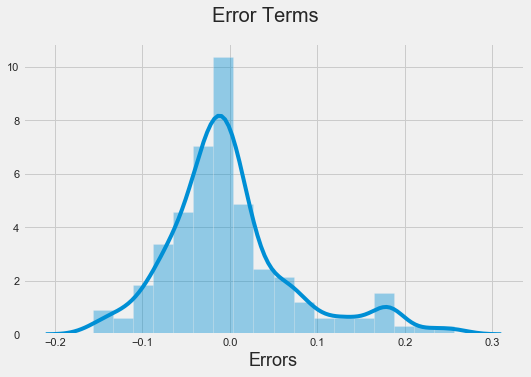

In [71]:
plt.style.use('fivethirtyeight')
y_train_price = lm.predict(X_train_rfe)
fig = plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_price))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## We can see that the error terms are normally distributed which is one of the assumption for the linear regression. 

## Making Predictions

In [72]:
car_sales_model_test[num_vars] = scaler.transform(car_sales_model_test[num_vars])

In [73]:
y_test = car_sales_model_test.pop('price')
X_test = car_sales_model_test

In [74]:
# Now let's use our model to make predictions.
X_test = sm.add_constant(X_test)

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [75]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

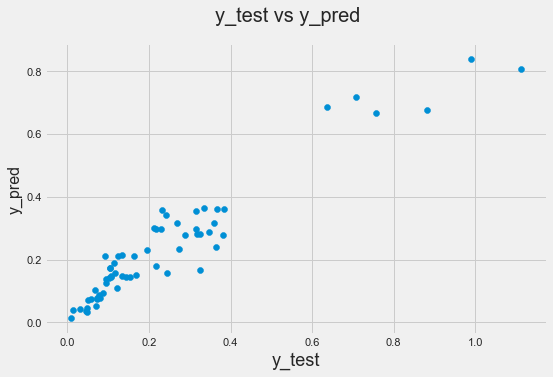

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Model evaluation metrics for regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [77]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

0.05236581045943725


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [78]:
print(metrics.mean_squared_error(y_test, y_pred))

0.005686430551367832


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [79]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0754084249362618


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## R2 score

In [80]:
metrics.r2_score(y_test, y_pred)

0.8936086371547681

***The coefficients for the linear regression line are***

    const               -0.0628
    curbweight           0.4530
    horsepower           0.3188
    car_range_premium    0.2964